In [164]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
from data import transforms
from PIL import Image
import torch
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
img_size=640
interpolation='bilinear'

In [166]:
fill_color = transforms.resolve_fill_color("mean", transforms.IMAGENET_DEFAULT_MEAN)


In [167]:
image_tfl = [
    #transforms.RandomRotation(rotation=90),
    transforms.ColorTransform(brightness=(0.8,1.5), contrast=(0.8, 1.2), hue=(-0.1, 0.1)),
    transforms.RandomFlip(horizontal=True, prob=0.5),
    transforms.RandomResizePad(target_size=img_size, interpolation=interpolation, scale=(0.5,3.), fill_color=fill_color, repeat=10),
    transforms.ImageToNumpy()
]

In [168]:
image_tf = transforms.Compose(image_tfl)

In [169]:
image_name = "./test_imgs/aug_test.png"


In [170]:
im = Image.open(image_name).convert('RGB')

In [171]:
im.size

(1920, 1080)

In [172]:
np_img = np.array(im, dtype=np.uint8)
np_img = np.moveaxis(np_img, 2, 0)
#torch_img = torch.from_numpy(np_img).to(dtype=torch.float32)


(640, 640)
[False]
(640, 640)
[ True]
{'bbox': array([[ 69.57976331, 573.42798815,  76.53773964, 580.38596449]]), 'cls': array([1])}
(640, 640)
[ True]
(640, 640)
[ True]
(640, 640)
[ True]
{'bbox': array([[100.80268788,  40.80268788, 110.88295667,  50.88295667]]), 'cls': array([1])}
(640, 640)
[ True]
{'bbox': array([[58.58354932, 37.58354932, 72.04190425, 51.04190425]]), 'cls': array([1])}
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[ True]
{'bbox': array([[112.09661137, 543.82119662, 123.3062725 , 555.03085776]]), 'cls': array([1])}
(640, 640)
[ True]
{'bbox': array([[114.32150262, 521.73277226, 125.75365288, 533.16492252]]), 'cls': array([1])}
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[ True]
(640, 640)
[False]
{'bbox': array([], shape=(0, 4), dtype=float64), 'cls': array([], dtype=int64)}
(640, 640)
[False]
(640, 640)
[False]
(640, 640)
[

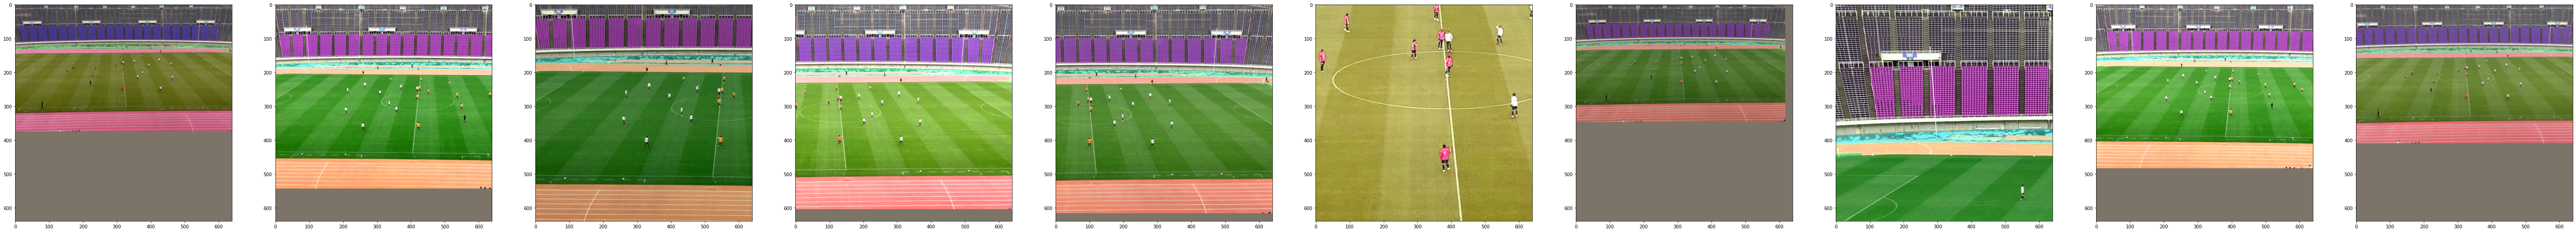

In [179]:
plt.figure(figsize=(100, 200))
for i in range(10):
    aug_img, ann = image_tf(im, {'bbox':np.array([[200,200,220,220]]).astype(np.float64), "cls":np.array([1])})
    #aug_img, ann = image_tf(im, {})
    print(ann)
    aug_img = aug_img.transpose((1,2,0))
    plt.subplot(4, 10, i+1)
    plt.imshow(aug_img)
plt.show()